In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [4]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2020') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2020.txt'>]

In [6]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

Cryptojacking is the act of using an individual's or an organization's computational power in order to mine cryptocurrency. In some scenarios, this can be considered as a monetization strategy, very much similar to advertisements. But to do so without the explicit consent of the computer owners is considered illegitimate. During previous years, attackers' focus was heavily laid on browser-based cryptojacking. However, it was noted that the attackers are now shifting their attention to more robust, more superior targets, such as cloud servers and cloud infrastructure. This paper analyses 11 forms of practical scenarios of cryptojacking attacks that are targeted towards cloud infrastructure. We carefully look at their similarities and properties, comparing those features with the limitations of existing literature regarding the detection systems. In this paper, we survey the attack forms, and we also survey the limitations of existing literature as an attempt to outline the research gap 

In [7]:
all_entities = NER(book_text)

In [8]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['Malware', 'Coinhive', 'WebAssembly (Wasm', 'Bitcoin', 'Bitcoin', 'Cryptojacking Malware', 'n’t', 'Spot Cryptojacking\nSource: Broadcom/Symantec', 'Windows', 'Hackers', 'Salon', 'UNICEF', 'Adguard', 'JavaScript', 'n’t', 'IPS', 'DNS', 'Cryptojacking', 'Bitcoin', 'Bitcoin', 'Digital', 'Bitcoin', 'Bitcoin', 'ASIC', 'Bitcoin', 'Bitcoin', 'Monero', 'Monero', 'Monero', 'AVG AntiVirus', 'Download AVG AntiVirus', 'Android', 'Browser', 'Bitcoin', 'WordPress', 'CPU', 'Firefox', 'Chrome', 'CPU', 'GPU', 'Adware Bitcoin', 'Adware Bitcoin', 'RAM', 'CPU', 'Auto Refresh Plus', 'Mozilla Firefox', 'RoughTed', 'CPU', 'Monero', 'UNICEF Australia', 'Monero', 'Coinhive', 'Coinhive', 'UK', 'National Health Service', 'BrowseAloud', 'Monero', 'CPU', 'The Pirate Bay', 'The Pirate Bay configured Coinhive', 'CPU', 'The Pirate Bay', 'RoughTed', 'RoughTed', '•\tObfuscate', 'The New York Times', 'NYT', 'The New York Times', 'NYT', 'RoughTed', 'Amazon', 'Content Distribution Network', '•\tRedirect', 'RoughTed', 'CPU

In [9]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence             entities
0  (Cryptojacking, is, the, act, of, using, an, i...                   []
1  (In, some, scenarios, ,, this, can, be, consid...                   []
2  (But, to, do, so, without, the, explicit, cons...                   []
3  (During, previous, years, ,, attackers, ', foc...                   []
4  (However, ,, it, was, noted, that, the, attack...                   []
5  (This, paper, analyses, 11, forms, of, practic...                   []
6  (We, carefully, look, at, their, similarities,...                   []
7  (In, this, paper, ,, we, survey, the, attack, ...  [Malware, Coinhive]
8  (In, -, browser, mining, programs, are, usuall...  [WebAssembly (Wasm]
9  (Several, ..., \n\n\n\n, A, new, threat, known...                   []


In [11]:
sent_entity_df

,sentence,entities
0,"(Cryptojacking, is, the, act, of, using, an, i...",[]
1,"(In, some, scenarios, ,, this, can, be, consid...",[]
2,"(But, to, do, so, without, the, explicit, cons...",[]
3,"(During, previous, years, ,, attackers, ', foc...",[]
4,"(However, ,, it, was, noted, that, the, attack...",[]
...,...,...
450,"(The, vulnerable, software, includes, Rejetto,...","[Rejetto, Jenkins, Oracle Weblogic, Apache Str..."
451,"(Strong, passwords, are, also, encouraged, to,...",[]
452,"(Palo, Alto, Networks, customers, are, protect...","[Palo Alto Networks, •\t\n•\tNext-Generation F..."
453,"(•, \t, WildFire, can, stop, the, malware, wit...",[]


In [12]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
7,"(In, this, paper, ,, we, survey, the, attack, ...","[Malware, Coinhive]"
8,"(In, -, browser, mining, programs, are, usuall...",[WebAssembly (Wasm]
10,"(Worse, ..., \n\n, =, =, =, =, =, =, =, =, =, ...",[Bitcoin]
16,"(And, that, ’s, how, the, cryptojacking, malwa...",[Bitcoin]
17,"(What, is, Cryptojacking, Malware, ?, \n)",[Cryptojacking Malware]
21,"(Cryptojacking, malware, is, n’t, like, regula...",[n’t]
37,"(Spot, Cryptojacking, \n, Source, :, Broadcom,...",[Spot Cryptojacking\nSource: Broadcom/Symantec]
47,"(For, instance, ,, there, is, definitely, some...",[Windows]
48,"(Hackers, use, your, device, to, run, complica...",[Hackers]
55,"(A, lot, of, websites, were, upfront, about, u...","[Salon, UNICEF]"


In [13]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
7,"(In, this, paper, ,, we, survey, the, attack, ...","[Malware, Coinhive]"
8,"(In, -, browser, mining, programs, are, usuall...",[WebAssembly (Wasm]
10,"(Worse, ..., \n\n, =, =, =, =, =, =, =, =, =, ...",[Bitcoin]
16,"(And, that, ’s, how, the, cryptojacking, malwa...",[Bitcoin]
17,"(What, is, Cryptojacking, Malware, ?, \n)",[Cryptojacking Malware]
...,...,...
447,"(While, Lucifer, version, 2, has, new, C2, at,...","[Lucifer, C2]"
448,"(Conclusion, \n, Lucifer, is, a, new, hybrid, ...","[Lucifer, DDoS, Windows]"
450,"(The, vulnerable, software, includes, Rejetto,...","[Rejetto, Jenkins, Oracle Weblogic, Apache Str..."
452,"(Palo, Alto, Networks, customers, are, protect...","[Palo Alto Networks, •\t\n•\tNext-Generation F..."


## Create relationships

In [14]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [15]:
relationship_df = pd.DataFrame(relationships)

In [16]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Malware,Coinhive
1,Malware,Coinhive
2,Coinhive,WebAssembly (Wasm
3,Malware,Coinhive
4,Coinhive,WebAssembly (Wasm
5,Malware,Coinhive
6,Coinhive,WebAssembly (Wasm
7,WebAssembly (Wasm,Bitcoin
8,Malware,Coinhive
9,Coinhive,WebAssembly (Wasm


In [17]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Coinhive,Malware
1,Coinhive,Malware
2,Coinhive,WebAssembly (Wasm
3,Coinhive,Malware
4,Coinhive,WebAssembly (Wasm
5,Coinhive,Malware
6,Coinhive,WebAssembly (Wasm
7,Bitcoin,WebAssembly (Wasm
8,Coinhive,Malware
9,Coinhive,WebAssembly (Wasm


In [18]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [19]:
relationship_df.head(10)

,source,target,value
0,Coinhive,Malware,6
1,Coinhive,WebAssembly (Wasm,5
2,Bitcoin,WebAssembly (Wasm,4
3,Bitcoin,Cryptojacking Malware,5
4,Cryptojacking Malware,n’t,2
5,Hackers,Windows,5
6,Salon,UNICEF,6
7,Adguard,UNICEF,5
8,Adguard,JavaScript,2
9,DNS,IPS,6


## Graph analysis and visualization

In [20]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

/Users/kvk/Uni/Sem4/Research/NLP Graphs copy/copynv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


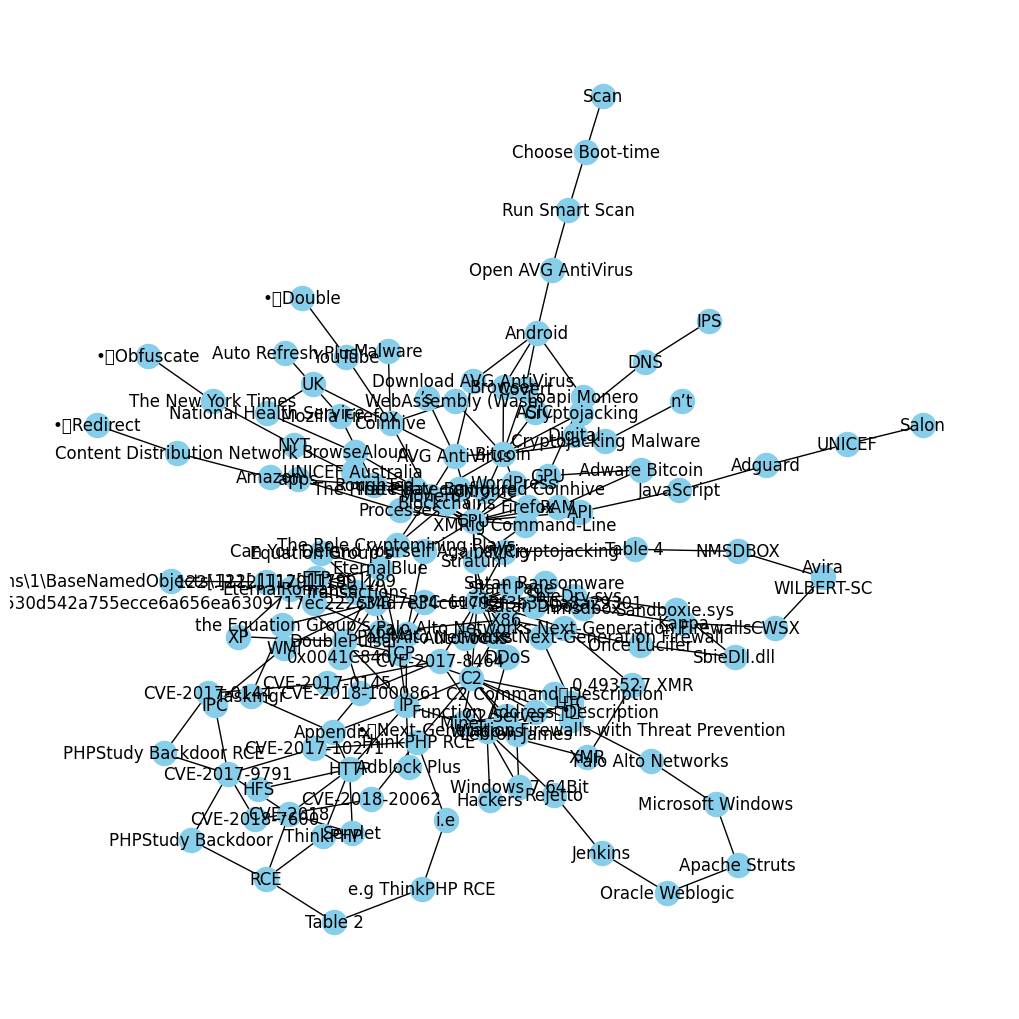

In [21]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [22]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


### The most important characters in The Witcher

In [23]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Coinhive': 0.0425531914893617,
 'Malware': 0.0070921985815602835,
 'WebAssembly (Wasm': 0.014184397163120567,
 'Bitcoin': 0.07801418439716312,
 'Cryptojacking Malware': 0.014184397163120567,
 'n’t': 0.0070921985815602835,
 'Hackers': 0.0070921985815602835,
 'Windows': 0.05673758865248227,
 'Salon': 0.0070921985815602835,
 'UNICEF': 0.014184397163120567,
 'Adguard': 0.014184397163120567,
 'JavaScript': 0.014184397163120567,
 'DNS': 0.014184397163120567,
 'IPS': 0.0070921985815602835,
 'Cryptojacking': 0.014184397163120567,
 'Digital': 0.0070921985815602835,
 'ASIC': 0.0070921985815602835,
 'Monero': 0.05673758865248227,
 'AVG AntiVirus': 0.0425531914893617,
 'Download AVG AntiVirus': 0.014184397163120567,
 'Android': 0.035460992907801414,
 'Browser': 0.014184397163120567,
 'WordPress': 0.014184397163120567,
 'CPU': 0.12056737588652482,
 'Firefox': 0.014184397163120567,
 'Chrome': 0.014184397163120567,
 'GPU': 0.02127659574468085,
 'Adware Bitcoin': 0.014184397163120567,
 'RAM': 0.0141

<Axes: >

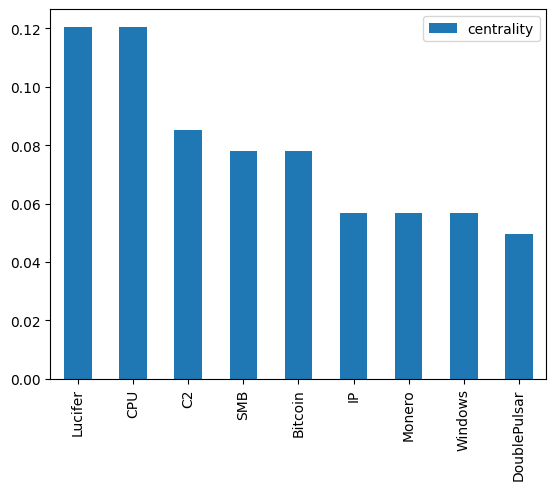

In [24]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

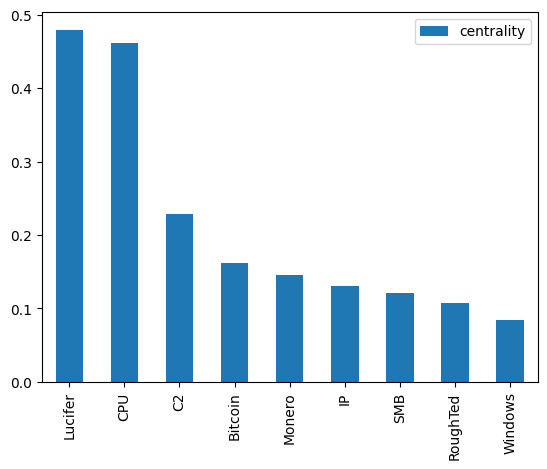

In [25]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

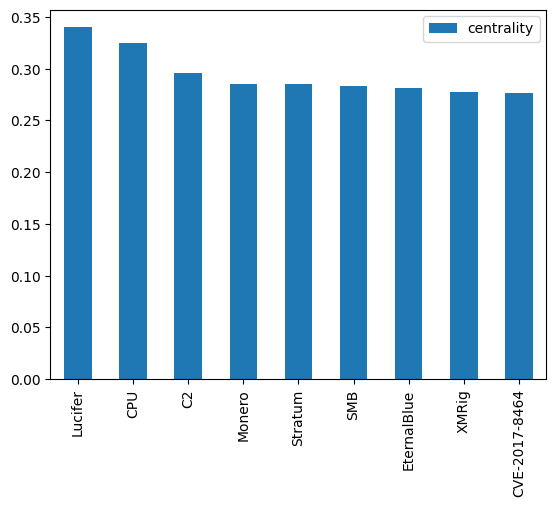

In [26]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [27]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [28]:
!pip install python-louvain

### Community detection

In [29]:
from community import community_louvain

In [30]:
communities = community_louvain.best_partition(G)

In [31]:
communities

{'Coinhive': 1,
 'Malware': 1,
 'WebAssembly (Wasm': 1,
 'Bitcoin': 1,
 'Cryptojacking Malware': 1,
 'n’t': 1,
 'Hackers': 2,
 'Windows': 2,
 'Salon': 3,
 'UNICEF': 3,
 'Adguard': 3,
 'JavaScript': 3,
 'DNS': 1,
 'IPS': 1,
 'Cryptojacking': 1,
 'Digital': 1,
 'ASIC': 1,
 'Monero': 1,
 'AVG AntiVirus': 1,
 'Download AVG AntiVirus': 1,
 'Android': 1,
 'Browser': 1,
 'WordPress': 1,
 'CPU': 4,
 'Firefox': 4,
 'Chrome': 4,
 'GPU': 4,
 'Adware Bitcoin': 4,
 'RAM': 4,
 'Auto Refresh Plus': 4,
 'Mozilla Firefox': 4,
 'RoughTed': 4,
 'UNICEF Australia': 1,
 'UK': 1,
 'National Health Service': 1,
 'BrowseAloud': 1,
 'The Pirate Bay': 4,
 'The Pirate Bay configured Coinhive': 4,
 'The New York Times': 4,
 '•\tObfuscate': 4,
 'NYT': 4,
 'Amazon': 4,
 'Content Distribution Network': 4,
 '•\tRedirect': 4,
 'Loapi Monero': 4,
 'Covert': 1,
 '’s': 1,
 'Open AVG AntiVirus': 6,
 'Run Smart Scan': 6,
 'Choose Boot-time': 6,
 'Scan': 6,
 'YouTube': 1,
 '•\tDouble': 1,
 'Processes': 4,
 'apps': 4,
 'Bloc

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_2020.html")

witcher_2020.html


### Evolution of characters' importance

In [34]:
from lib.utils.functions import *

In [35]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2020') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [36]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()